In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection as ms
from sklearn import feature_extraction as fe
from modules.data_extractor import extractor
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
((trX, trY),(teX, teY)) = extractor(file='data/emails.csv').min_max_nomalized()

Normalizing-MIN-MAX


In [3]:
pca = PCA(n_components=2).fit_transform(trX)
k_means = KMeans(n_clusters=2).fit(trX)

In [4]:
p = k_means.predict(trX)

set_1 = np.take(pca,np.array([i for i in range(len(p)) if p[i] == 0]),axis=0)
set_2 = np.take(pca,np.array([i for i in range(len(p)) if p[i] == 1]),axis=0)

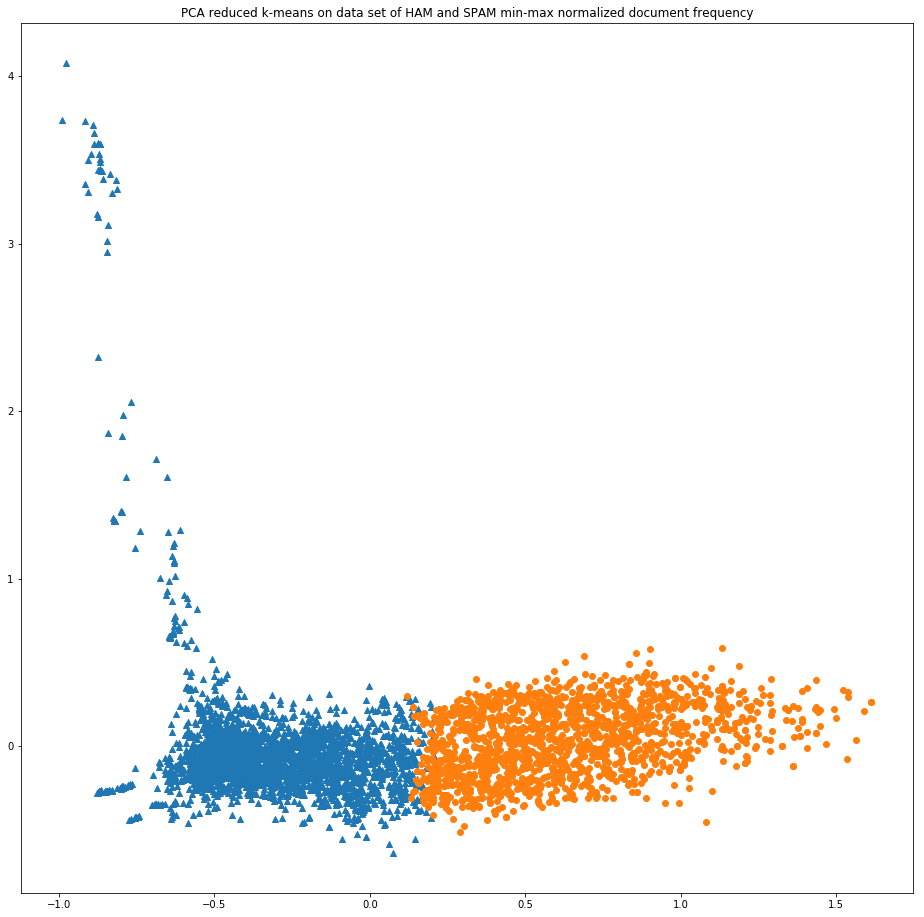

In [5]:
plt.figure(figsize=(16,16))
plt.scatter(set_1[:,0],set_1[:,1],  marker='^')
plt.scatter(set_2[:,0],set_2[:,1], marker='o')
plt.title("PCA reduced k-means on data set of HAM and SPAM min-max normalized document frequency")
plt.show()

In [6]:
set_3 = np.take(pca,np.array([i for i in range(len(trY)) if trY[i][0] == 1]),axis=0)
set_4 = np.take(pca,np.array([i for i in range(len(trY)) if trY[i][0] == 0]),axis=0)

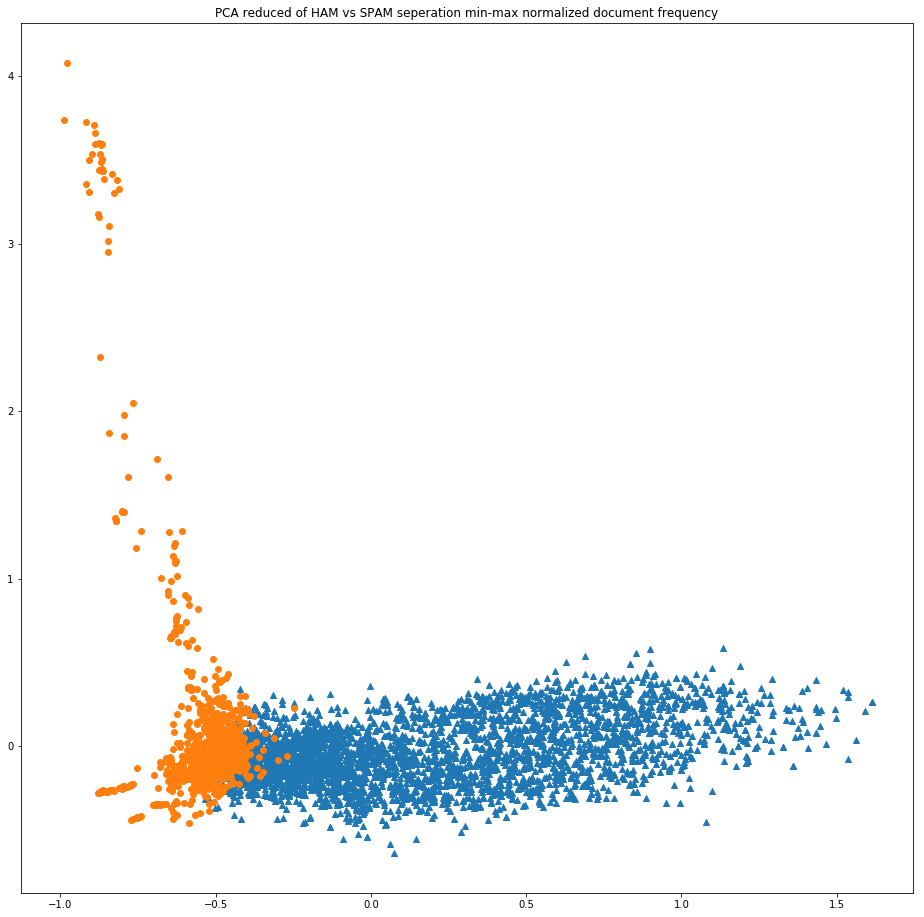

In [7]:
plt.figure(figsize=(16,16))
plt.scatter(set_3[:,0],set_3[:,1],  marker='^')
plt.scatter(set_4[:,0],set_4[:,1], marker='o')
plt.title("PCA reduced of HAM vs SPAM seperation min-max normalized document frequency")
plt.show()

In [12]:
w, v = np.linalg.eig(trX@trX.T)

In [13]:
w

array([3.32791089e+03+0.j, 8.60674904e+02+0.j, 5.89004713e+02+0.j, ...,
       1.15695965e-32+0.j, 2.50000000e-01+0.j, 2.50000000e-01+0.j])

In [25]:
ind = np.sqrt(np.take(w,np.argsort(w,axis=0)[::-1]))
sumation = np.sum(ind)

In [30]:
for i in range(len(ind)):
    if np.sum(ind[0:i])/sumation > 0.7:
        print(i)
        break

1500
